In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys

In [2]:
Reactome = pd.read_excel('03_Reactome entrez genes ids.xlsx', header = None)
Kegg = pd.read_excel('05_KEGG entrez genes ids.xlsx', header = None)
Biocarta = pd.read_excel('07_BioCarta entrez genes ids.xlsx', header = None)

In [72]:
Reac_dic = dict()
Kegg_dic = dict()
Bio_dic = dict()

**check to length of gene of Reactome Database**

In [73]:
for i in range(len(Reactome)):
    count_gene = len(Reactome.iloc[i].dropna()[3:].values)
    
    if count_gene in Reac_dic:
        Reac_dic[count_gene] = Reac_dic.get(count_gene) + 1
    else:
        Reac_dic[count_gene] = 1

In [74]:
Reac_dic = sorted(Reac_dic.items())

In [75]:
Reac_x = []
Reac_y = []
for i in range(len(Reac_dic)):
    Reac_x.append(Reac_dic[i][0])
    Reac_y.append(Reac_dic[i][1]) 

**check to length of gene of Kegg Database**

In [76]:
for i in range(len(Kegg)):
    count_gene = len(Kegg.iloc[i].dropna()[3:].values)
    
    if count_gene in Kegg_dic:
        Kegg_dic[count_gene] = Kegg_dic.get(count_gene) + 1
    else:
        Kegg_dic[count_gene] = 1

In [77]:
Kegg_dic = sorted(Kegg_dic.items())

In [78]:
Kegg_x = []
Kegg_y = []
for i in range(len(Kegg_dic)):
    Kegg_x.append(Kegg_dic[i][0])
    Kegg_y.append(Kegg_dic[i][1]) 

**check to length of gene of Biocarta Database**

In [79]:
for i in range(len(Biocarta)):
    count_gene = len(Biocarta.iloc[i].dropna()[3:].values)
    
    if count_gene in Bio_dic:
        Bio_dic[count_gene] = Bio_dic.get(count_gene) + 1
    else:
        Bio_dic[count_gene] = 1

In [80]:
Bio_dic = sorted(Bio_dic.items())

In [81]:
Bio_x = []
Bio_y = []
for i in range(len(Bio_dic)):
    Bio_x.append(Bio_dic[i][0])
    Bio_y.append(Bio_dic[i][1]) 

**drow graphs with matplotlib**

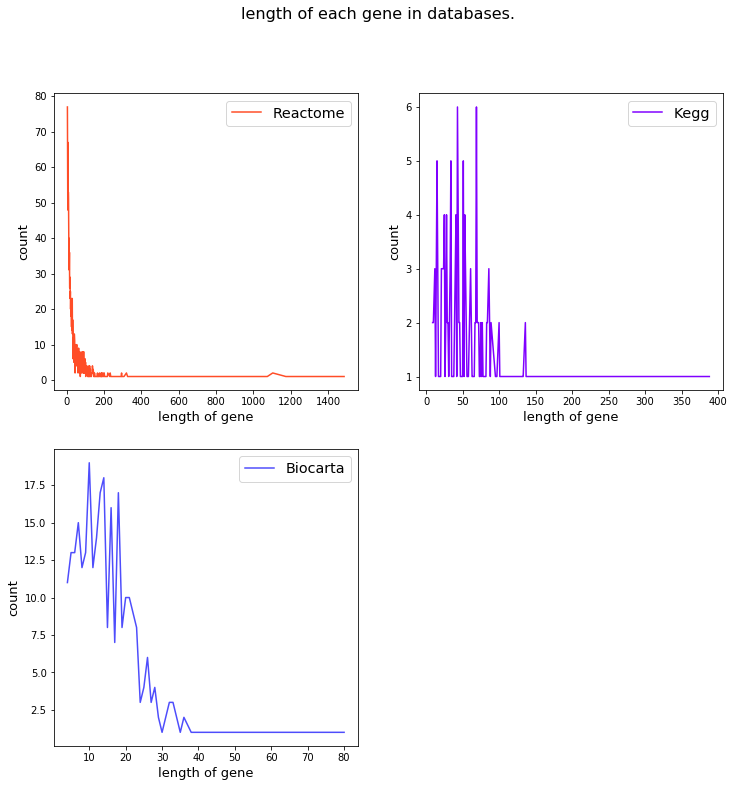

In [111]:
plt.figure(figsize= (12,12)).suptitle("length of each gene in databases.",fontsize=16)
plt.subplot(221)
plt.plot(Reac_x,Reac_y,linestyle='-', c=plt.cm.rainbow(0.9), label='Reactome')
plt.xlabel("length of gene", fontsize = 13)
plt.ylabel("count", fontsize = 13)
plt.legend(fontsize='x-large')

plt.subplot(222)
plt.plot(Kegg_x,Kegg_y,linestyle='-', c=plt.cm.rainbow(0), label='Kegg')
plt.xlabel("length of gene", fontsize = 13)
plt.ylabel("count", fontsize = 13)
plt.legend(fontsize='x-large')

plt.subplot(223)
plt.plot(Bio_x,Bio_y,linestyle='-', c=plt.cm.rainbow(0.1), label='Biocarta')
plt.xlabel("length of gene",fontsize = 13)
plt.ylabel("count",fontsize = 13)
plt.legend(fontsize='x-large')
plt.savefig("test.png")

In [129]:
np.median(np.array(Bio_x))

22.5

**find perfectly contain between pathways of databases**

In [3]:
def same_database(database):
    super_set = dict()
    dir_super_set = dict()
    super_list = []
    for i in range(len(database)):
        gene_set = set(database.iloc[i].dropna()[3:].values)
        leng_gene = len(gene_set)
        
        if i != len(database)-1 :
            for j in range(i+1,len(database)):
                gene_set2 = set(database.iloc[j].dropna()[3:].values)
                leng_gene2 = len(gene_set2)
                
                if leng_gene > leng_gene2:
                    short_gene = leng_gene2
                    short_gene_id = j
                    long_gene_id = i
                else:
                    short_gene = leng_gene
                    short_gene_id = i
                    long_gene_id = j
                    
                intersection = gene_set & gene_set2
                leng_inter = len(intersection)
                
                contain_rate = round((leng_inter/short_gene) * 100,0)
                
                if contain_rate == 100:
                    if short_gene_id in super_set:
                        super_set[short_gene_id] = super_set.get(short_gene_id)+[long_gene_id]
                        leng_dir = dir_super_set.get(short_gene_id)
                        
                        for k in range(len(leng_dir)):
                            index = leng_dir[k]
                            dir_set = set(database.iloc[index].dropna()[3:].values)
                            compare_set = set(database.iloc[long_gene_id].dropna()[3:].values)
                            
                            if len(dir_set) < len(compare_set):
                                intersec = dir_set & compare_set
                                contain_rt = round(len(intersec)/len(dir_set)*100,0)
                                
                                if contain_rt == 100:
                                    if long_gene_id not in super_list:
                                        super_list.append(long_gene_id)
                                else:
                                    super_list.append(index)
                            else:
                                super_list.append(index)
                                
                        if long_gene_id not in super_list:
                            super_list.append(long_gene_id)
                            
                        dir_super_set[short_gene_id] = super_list
                        super_list = []
                    else:
                        super_set[short_gene_id] = [long_gene_id]
                        dir_super_set[short_gene_id] = [long_gene_id]
                    
    return super_set, dir_super_set

In [7]:
def symbol_same_database(database):
    super_set = dict()
    dir_super_set = dict()
    super_list = []
    for i in range(len(database)):
        gene_set = set(database.iloc[i].dropna()[3:].values)
        leng_gene = len(gene_set)
        
        if i != len(database)-1 :
            for j in range(i+1,len(database)):
                gene_set2 = set(database.iloc[j].dropna()[3:].values)
                leng_gene2 = len(gene_set2)
                
                if leng_gene > leng_gene2:
                    short_gene = leng_gene2
                    short_gene_id = database.iloc[j][0]
                    long_gene_id = database.iloc[i][0]
                else:
                    short_gene = leng_gene
                    short_gene_id = database.iloc[i][0]
                    long_gene_id = database.iloc[j][0]
                    
                intersection = gene_set & gene_set2
                leng_inter = len(intersection)
                
                contain_rate = round((leng_inter/short_gene) * 100,0)
                
                if contain_rate == 100:
                    if short_gene_id in super_set:
                        super_set[short_gene_id] = super_set.get(short_gene_id)+[long_gene_id]
                        leng_dir = dir_super_set.get(short_gene_id)
                        
                        for k in range(len(leng_dir)):
                            symbol = leng_dir[k]
                            index = database[database[0] == symbol].index.values[0]
                            compare_index = database[database[0] == long_gene_id].index.values[0]
                            dir_set = set(database.iloc[index].dropna()[3:].values)
                            compare_set = set(database.iloc[compare_index].dropna()[3:].values)
                            
                            if len(dir_set) < len(compare_set):
                                intersec = dir_set & compare_set
                                contain_rt = round(len(intersec)/len(dir_set)*100,0)
                                
                                if contain_rt == 100:
                                    if long_gene_id not in super_list:
                                        super_list.append(long_gene_id)
                                else:
                                    super_list.append(symbol)
                            else:
                                super_list.append(symbol)
                                
                        if long_gene_id not in super_list:
                            super_list.append(long_gene_id)
                            
                        dir_super_set[short_gene_id] = super_list
                        super_list = []
                    else:
                        super_set[short_gene_id] = [long_gene_id]
                        dir_super_set[short_gene_id] = [long_gene_id]
                    
    return super_set, dir_super_set

In [4]:
Reac_super_set, Reac_dir_super_set = same_database(Reactome)

In [18]:
sym_Reac_super_set, sym_Reac_dir_super_set = symbol_same_database(Reactome)

In [25]:
super_setfile = pd.DataFrame.from_dict(sym_Reac_super_set, orient='index')
super_dir_setfile = pd.DataFrame.from_dict(sym_Reac_dir_super_set, orient='index')

In [26]:
super_setfile.to_csv("Reactome_pathway_symbol_super_set.csv", header = None)
super_dir_setfile.to_csv("Reactome_pathway_symbol_dir_super_set.csv", header = None)

In [8]:
Kegg_super_set, Kegg_dir_super_set = same_database(Kegg)
sym_Kegg_super_set, sym_Kegg_dir_super_set = symbol_same_database(Kegg)

Bio_super_set, Bio_dir_super_set = same_database(Biocarta)
sym_Bio_super_set, sym_Bio_dir_super_set = symbol_same_database(Biocarta)

K_super_setfile = pd.DataFrame.from_dict(sym_Kegg_super_set, orient='index')
K_super_dir_setfile = pd.DataFrame.from_dict(sym_Kegg_dir_super_set, orient='index')

B_super_setfile = pd.DataFrame.from_dict(sym_Bio_super_set, orient='index')
B_super_dir_setfile = pd.DataFrame.from_dict(sym_Bio_dir_super_set, orient='index')

K_super_setfile.to_csv("Kegg_pathway_symbol_super_set.csv", header = None)
K_super_dir_setfile.to_csv("Kegg_pathway_symbol_dir_super_set.csv", header = None)

B_super_setfile.to_csv("Biocarta_pathway_symbol_super_set.csv", header = None)
B_super_dir_setfile.to_csv("Biocarta_pathway_symbol_dir_super_set.csv", header = None)